In [1]:
import phylustrator as ph
import ete3
import random

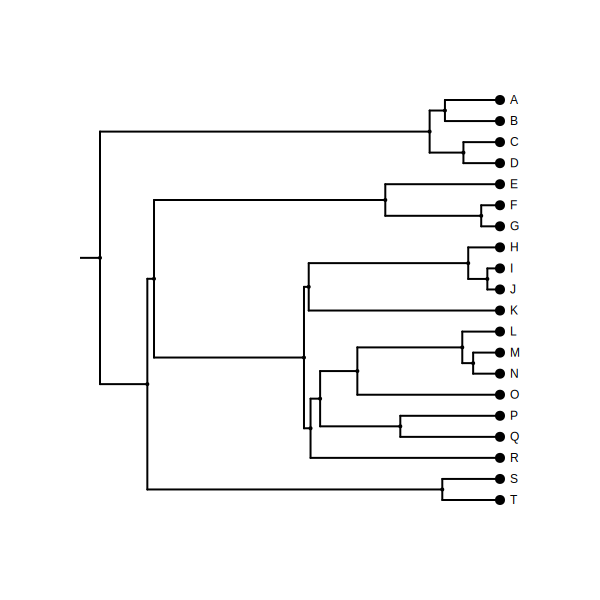

In [2]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)
v.add_leaf_names()
v.draw()
v.d

# Decorating a tree

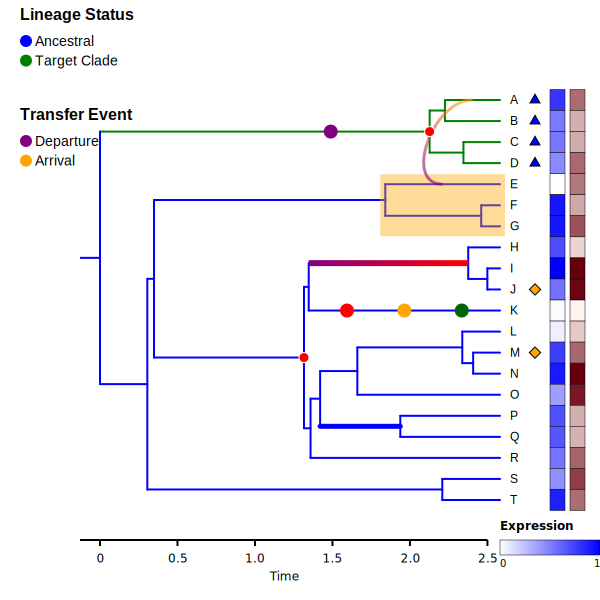

In [3]:
with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline(), format=1)
    
my_style = ph.TreeStyle(
    width=600,
    height=600,
    leaf_r=0,               
    node_r=0,               
    branch_stroke_width=2,  
    branch_color="black",
    font_size=12,
    font_family="Arial",
)

v = ph.VerticalTreeDrawer(t, style=my_style)

target = t.get_common_ancestor("A", "D") 

node_colors = {n: "blue" for n in t.traverse()}
for n in target.traverse():
    node_colors[n] = "green"

v.draw(branch2color=node_colors)
v.add_leaf_names()

# Adding shapes
v.add_leaf_shapes(
    leaves=["A", "B", "C", "D"],
    shape="triangle",
    fill="blue",
    r=5,                   # Changed size=10 -> r=5
    stroke="black",
    stroke_width=1,
    offset=35,             
)

v.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    r=4,                   # Changed size=8 -> r=4
    stroke="black",
    stroke_width=1,
    offset=35,
    rotation=45,
)

events = [
    {"branch": "K", "where": 0.2, "shape": "circle", "fill": "red", "r": 7},       # size=14 -> r=7
    {"branch": "K", "where": 0.5, "shape": "circle", "fill": "orange", "r": 7},    # size=14 -> r=7
    {"branch": "K", "where": 0.8, "shape": "circle", "fill": "darkgreen", "r": 7}, # size=14 -> r=7
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("A", "D") 

events = [
    {"branch": target, "where": 0.7, "shape": "circle", "fill": "purple", "r": 7}, # size=14 -> r=7
]

v.add_branch_shapes(events, orient=None, offset=0)

target = t.get_common_ancestor("E", "G") 
v.highlight_clade(target, color="orange", opacity=0.4)

target = t.get_common_ancestor("P", "Q") 
v.highlight_branch(target, color="blue", stroke_width=5) # size -> stroke_width


target = t.get_common_ancestor("H", "J") 
v.gradient_branch(target, colors=("purple", "red"), stroke_width=6) # size -> stroke_width

transfer_data = [
    {"from": "E", "to": "A", "freq": 1.0},
]

v.plot_transfers(
    transfer_data,
    curve_type="C",        
    stroke_width=3,        # already used stroke_width
    opacity=0.6,
    gradient_colors=("purple", "orange") 
)

v.add_time_axis(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5], 
    label="Time", 
    y_offset=20  
)

# Heatmaps use width and border_width (standard)
data_col1 = {leaf.name: random.uniform(0, 1) for leaf in t.get_leaves()}
v.add_heatmap(
    data_col1,
    width=15,
    offset=50,
    low_color="white",
    high_color="blue",
    border_color="black",
    border_width=0.5
)

data_col2 = {leaf.name: random.uniform(0, 100) for leaf in t.get_leaves()}
v.add_heatmap(
    data_col2,
    width=15,
    offset=70,
    low_color="#fff5f0",
    high_color="#67000d",
    border_color="black",
    border_width=0.5
)

target1 = t.get_common_ancestor("A", "D") 
target2 = t.get_common_ancestor("H", "R") 
v.add_node_shapes([target1, target2], shape="circle", fill="red", r=5, stroke="white", stroke_width=1) # size=10 -> r=5

# Explaining the branch/node colors
v.add_categorical_legend(
    palette={"Ancestral": "blue", "Target Clade": "green"}, 
    title="Lineage Status",
    x=-280, y=-280  # Top-left area
)

# Explaining the purple-to-orange transfers
v.add_transfer_legend(
    colors=("purple", "orange"),
    x=-280, y=-180  # Positioned below the categorical legend
)

# Color bar for the first heatmap (Expression)
v.add_color_bar(
    low_color="white", 
    high_color="blue", 
    vmin=0, vmax=1, 
    title="Expression",
    x=200,  # Bottom-left area
)



v.d

In [13]:
# SVG always works
v.save_svg("../examples/figures/vertical_tree.svg")

# PNG requires cairosvg (install: pip install "phylustrator[export]")
v.save_png("../examples/figures/vertical_tree.png", scale=3.0)
